<a href="https://colab.research.google.com/github/AnahitSh/proj-ds/blob/main/School_Shooting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing School Shooting Incidents in the US
---



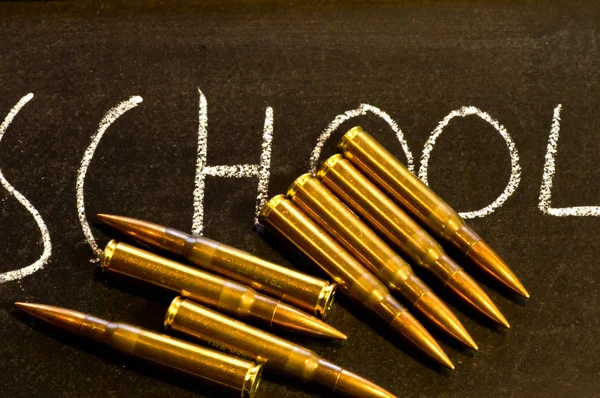

My project is about school shooting.

"I did choose this data set, because it important in addressing a critical issue, generating public interest, promoting interdisciplinary collaboration, and potentially having a real-world impact."
School shootings are unfortunately an important issue in modern society as they represent a significant threat to the safety and well-being of students, teachers, and staff. These incidents can have lasting physical, emotional, and psychological effects on the victims, their families, and the community at large. School shootings can also cause disruptions to the educational system, leading to school closures, decreased attendance, and a loss of instructional time.




Research Question
---











What insights can be gained from analyzing the school shooting data, and how can these insights be used to inform prevention strategies and policy decisions?








# The importance of this quesstion





Analyzing school shooting data can provide valuable insights into the patterns and characteristics of these incidents, such as the location, time of day, type of weapon used, and the characteristics of the perpetrators and victims. By understanding these patterns, policymakers and educators can develop prevention strategies and policies that address the underlying causes of school shootings, such as bullying, mental health issues, access to firearms, and social isolation. Additionally, analyzing the data can help identify potential warning signs and risk factors, which can be used to develop early warning systems to prevent future incidents. Overall, gaining insights from analyzing school shooting data can help inform evidence-based prevention strategies and policies, which can ultimately help save lives and create safer school environments.

In this project I will use school shooting data from[Kaggle.com](https://https://www.kaggle.com/datasets/sujaykapadnis/school-shooting-data), to perform exploratory data analysis, build predictive models, and develop visualizations to find out insights. 

# About Data
(I took this information from Kaggle.com School Shooting Data)

Since 2009, at least 177 of America’s schools experienced a shooting. These tragedies are as diverse as our nation, but the depth of trauma is hard to convey. There is no standard definition for what qualifies as a school shooting in the US. Nor is there a universally accepted database. So CNN built our own. We examined 10 years of shootings on K-12 campuses and found two sobering truths: School shootings are increasing, and no type of community is spared.

[Read the story here ](https://https://www.cnn.com/interactive/2019/07/us/ten-years-of-school-shootings-trnd/).

If your school experienced a shooting that isn’t listed here, contact us using the form [ here at the foot of the story.](https://https://www.cnn.com/interactive/2019/07/us/ten-years-of-school-shootings-trnd/#methodology)

# Methodology
CNN reviewed hundreds of reported shootings at K-12 schools from 2009 until 2018. To compile our dataset, we primarily relied on open-source databases, news reports, calls to police departments, information on school websites and 2009-2013 data provided by the Northwestern Institute on Complex Systems (NICO).

# License
This data is licensed under the MIT license.

# Planning  

**1.**   Exploring Data:
*    Loding the dataset and exploring contents to gain an understanding it.
*   Identifying missing data 
*   Cleaning and preprocessing data, to remove any duplicates, missing values, and errors.

**2.**  Describing Statistics:

*   Calculate basic descriptive statistics such as the mean, median, and mode for key variables.
*   Use visualization tools such as histograms, scatterplots, and heatmaps to summarize the data and detect patterns.

**3.**  Doing Geospatial Analysis:

*   Use geospatial analysis techniques to visualize the distribution of school shootings across different states and regions.
*   Identify geographic hotspots of incidents to better understand the spatial patterns of the data.

**4.**   Doing Time-series Analysis:
*   Analyze the trends and patterns of school shootings over time.

**5.**   Doing Predictive Analysis:
*   Build predictive models to forecast the likelihood of future school shootings based on historical data.
*   Use machine learning algorithms such as logistic regression, decision trees, and random forests to identify the most important predictors of school shootings and build predictive models.

**6.**  Results:
*   Using the insights gained from the analysis to inform prevention strategies and policy decisions.
  
**7.**   Conclutions:








Let's load the data.

In [ ]:
# Loding the Schoot Shooting Dataset, converting it into a pandas DataFrame, and displaying first five rows.

from google.colab import files 
import pandas as pd 

uploaded = files.upload() 

School_shooting = pd.read_csv('dataset.csv') 
School_shooting.head()

After displaying first 5 rows, we can see the columns that we will work with.

LONCOD: Longitude code

LATCOD: Latitude code

CDCODE: Code for the Center for Disease Control and Prevention (CDC)

year: Year of the incident

school: Name of the school

city: City where the incident occurred

state: State where the incident occurred

address: Address where the incident occurred

urbanrural: Whether the incident occurred in an urban or rural area

race: Race of the perpetrator or victims (if applicable)

killed: Number of people killed in the incident

injured: Number of people injured in the incident

victims: Total number of victims in the incident (including those killed and injured) date: Date of the incident

type: Type of incident (e.g., shooting, stabbing, etc.)

NCESSCH: National Center for Education Statistics (NCES) School ID

time: Time of the incident

Let's examine the data.

In [ ]:
# displaying shape
School_shooting.shape

There is a 180 rows and 17 columns in School_shooting dataset.

In [ ]:
# lets get more information
School_shooting.info()

The columns represent different attributes of the data. The non-null count shows the number of non-missing values for each column, and the Dtype shows the data type of each column.

It appears that some columns have missing values, as indicated by the non-null count being less than the total number of entries (180). The columns with missing values are LONCOD, LATCOD, CDCODE, urbanrural, race, NCESSCH, and time.

The data types include float64, int64, and object, where float64 and int64 represent numerical data, and object represents string or categorical data.

In [ ]:
#examining the data

School_shooting.describe()

Based on this description, I can say:

Dataset contains information on 180 school shooting incidents.

The shootings occurred between 2009 and 2018, with an average of approximately 20 incidents per year.

The mean number of pepole killed in each incidents is 0.63, while the mean number of pepole injured is 1.34. The mean number of victims (i.e., killed or injured) is 1.98.

The maximum number of pepole killed in a single incident is 26, while the maximum number of pepole injured is 14. The maximum number of victims in a single incident is 31.

The latitude and longtitude of the incidents range from approximately -158 to 61 and -93 to 62, respectively, indicating that the shooting occurred throughout the United States.

The "CDCODE" column has 169 non - null values, indicating that some incidents are not associated with a particular county.

The "NCESSCH" column has 175 non - null values, indicating that some incidents are not associated with a particular school.

Target variables in School_shooting dataset are "killed", "injured", and "victims". These variables represent the number of pepole who were killed, injured, and the total number of victims in each school shooting incident, respectively. The other variales such as "LONCOD", "LATCOD", "CDCODE", "year", and "NCESSCH" are the independent variables or features that describe each incident.


# Data Cleaning
After data been loded, and observed, next step is need be cleaned and preprocessed to remove any duplicates, missing values, and errors. The data will also be transformed into a format that is suitable for analysis.

I will check the number of missing values using the isnull() and sum() functions.

In [ ]:
# Checking  for missing values
School_shooting.isnull().sum() 

There are 3 null values in "LONCOD", "LATCOD", and "urbanrural" columns.

11 null values in "CDCODE" column.

7 null values in "race" and 5 null values in "NCESSCH" colunms.

 For  perform a complete analysis and obtain accurate results, it's better to impute the missing values. However, for the NCESSCH and time columns, if the missing values are not essential for the analysis, I can either drop the corresponding rows or ignore them. On the other hand, the 'race' column is likely to be important for analyzing the demographic distribution of school shootings.

In [ ]:
#Imputing missing values with the mode (most frequent value) of the column
School_shooting["race"].fillna(School_shooting["race"].mode()[0], inplace=True)

# Fill in missing values for the 'LATCOD', 'CDCODE', and 'LONCOD' columns with the mean
School_shooting["LATCOD"].fillna(School_shooting["LATCOD"].mean(), inplace=True)
School_shooting["CDCODE"].fillna(School_shooting["CDCODE"].mean(), inplace=True)
School_shooting["LONCOD"].fillna(School_shooting["LONCOD"].mean(), inplace=True)

# Fill in missing values for the 'urbanrural' column with the most common value
School_shooting["urbanrural"].fillna(School_shooting["urbanrural"].mode()[0], inplace=True)

# Droping any rows with missing or invalid location data
School_shooting = School_shooting.dropna(subset=['NCESSCH', 'time'])

# Verifing that there are no more missing values in the "race" column
School_shooting.isnull().sum() 

I impute the missing values in the "race" and "urbanrural" columns using the fillna() method and the mode (most frequent value) of the column. I used the inplace=True parameter ensures that the change is made in place in the original DataFrame. For "LONCOD", "LATCOD", and "CDCODE" volumns I did use mean of each respective column.
For "NESSCH" and "time" I used dropna() method to remove rows with missing values, and **subset** parameter specifies the columns to check for missing values.


# Interactive map '**School shooting locations in US**'



In [ ]:
# Importing necessary librarie that I need for this map
import folium

# Createing a Folium map centered on the US
map = folium.Map(location=[39.8283,-98.5795], zoom_start=4)

# Adding markers to the map for each school shooting location
for index, row in School_shooting.iterrows():
    lat = row['LATCOD']
    lon = row['LONCOD']
    school = row['school']
    killed = row['killed']
    injuries = row['injured']
    
    # Customizing the marker based on the number of killed and injuried
    if killed > 0:
        color = 'red'
    elif injuries > 0:
         color = 'orange'
    else:
         color = 'green'
    
    # Adding the marker to the map
    folium.Marker(location=[lat, lon], popup=school, icon=folium.Icon(color=color)).add_to(map)

# Saving the map as an HTML file
map.save('school_shooting_map.html')
map

I created a Folium map centered on the US with a zoom level of 4. For each school shooting location, I add a marker to the map with the name of the school as a popup (which specifies the school that associated with the shoothing).

The color of the marker I customized, based on the number of people killed, the marker is red, if there were injured, not killed, the marker is orange. If there were no injured or killed, the marker is green.

The map shows the locations of school shooting incidrnts in US, with markers indicating the name of the school and the severity of incident.

Then I did save the map as a HTML file.

You can see geographic patterns or trends based on distribution and density of markers.

# School Shooting heatmap
To visualize the correlation between different variables I need to creat a heatmap.

In [ ]:
# Let's import necessary libraries and create a heatmap of correlation matrix for the School_shooting 

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(School_shooting.corr(), cmap='YlGnBu')
plt.show()

The 'corr()' function is calculating coefficient between each pair of columns in the dataset, which is a measure of the linear realationship between two variables, which range from -1(indicating a perfect negative correlation) to +1(indicating perfect positive correlation), with 0 indicating no correlation.

The heatmap visualizes the correlation coefficients using a colorcode system. The color scale goes from blue (indicating a negative correlation) to yellow (indicating a positive correlation). Darker colors indicate stronger correlations.
AS you see there is a positive correlation between "killed" and "victims", "injured" and "victims", the number of killed or injured increases, the number of the victims also inctease. 

# School Shooting Incidents by State and Year

To further clarify our heatmap visualization, let's create another one that shows the number of people killed in school shooting incidents for each state and year.

---



In [ ]:
# Let's create a pivot table with the number of incidents per state and year
table = School_shooting.pivot_table(index='state', columns='year', values='killed', aggfunc='count')

# Create the heatmap
plt.figure(figsize=(20,10))
sns.heatmap(table, cmap='Reds', annot=True, fmt='.0f', linewidths=.5)
plt.title('School Shooting Incidents by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

I used pivot_table function to create a table where the rows are the states, the columns are the years, and the values in each cell are the exact number of people killed in school shooting incidents that occurred in that state and year.

The aggfunc='count' argument specifies that I want to count the number of incidents that occurred in each state and year. The resulting table I plotted as a heatmap using sns.heatmap function from the Seaborn library. The cmap='Reds' argument sets the color map for the heatmap to shades of red, with darker color indicating a higher number of peapole killed. The linewidths=.5 argument sets the width of the lines between cells.  

This heatmap, interactive provides a visual summary of the data that allows viewers to quickly identify which states have experienced the highest number of school shootings, and which years had the highest number of incidents. Suddenly, starting from 2014 the incidents was increased, and also you can see which stats experienced the most shootings and killed. I can see that California and Florida had the most shooting before(the data I have from 2009) and continuing to be **States With the Most School Shootings** .


# School Shooting bar graph by type of the incident

Next I'll create a bar graph that will provide a quick visual summary of the distribution of killed people across different types of school shooting incidents.

In [ ]:
#Creating a bar graph using seaborn countplot function

import seaborn as sns

sns.countplot(x = 'killed', data = School_shooting, hue='type')

The **x** argument specifies that the values to be counted and plotted on the x-axis are the number of people killed in each incident. 
The **hue** argument specifies the type of the school shooting incident, and the colors of the bars are then further differentiated according to the type of the incident.  
The plot shows separate bars for each number of killed, and the height of each bar represents the number of incidents that had that number of killed. As you can see the high school category experienced the most shootings. 


# School Shooting Incidents by Year

Let's create another visualization to clearly show the trend of school shootings increasing over time.

In [ ]:
# Grouping the incidents by year and count the number of incidents per year
incidents_by_year = School_shooting.groupby("year").size().reset_index(name="num_incidents")

# Let's plot the line chart showing the number of incidents over time
plt.figure(figsize=(10, 5))
sns.lineplot(x="year", y="num_incidents", data=incidents_by_year)
plt.title('School Shooting Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

First I group and count the number og incidents for each year using **groupby()** and **sizi()** methods, then  created a line plot using sns.lineplot(), which shows the number of school shooting incidents over time.

You can see the result is very sad.

The objective of the School Shooting project based on heatmaps or other visualizations is to make the data more accessible and understandable to a wider audience, and to help inform policy and decision-making related to school safety and gun violence prevention.

# Predictive analysis

In [ ]:
# Let's separate target variable from the features, and separate target variable from the features

X = School_shooting.drop(['killed', 'injured'], axis=1)
y = School_shooting[['killed', 'injured']]

# Let's print the shape of the featurres and target variables

print("Shape of features:", X.shape)
print("Shape of target variables:", y.shape)

After difining target variables (which are "killed" and "injured"), I used the **drop()** function to remove them from the dataset, creating a new dataframes **X** with only the features, and y containing only the target variables. Then I print the shape of the features and target variables to verify they have been separated correctly.

In [ ]:
# Let's split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

I used the train_test_split() function from scikit-learn to split the data into training and testing set. I passed in the featurea X and the target variables y, along with the test size as a proportion of the dataset (in this case .2 or 20%), and set the random state to reproducibility. The function returns 4 sets of data: X_train (training features), X_test (testing features), y_train (training target variables), and y_test (testing target variables).

Now I'm going to separat the numerical and categorical features in the training data, then encode the categorical features in the training data.

In [ ]:
# Importing necessary libraries

from sklearn.preprocessing import OneHotEncoder
import numpy as np

# identifying the categorical features to encode

cat_features_train = ['school', 'city', 'state', 'address', 'urbanrural', 'race', 'date', 'type']

#  Fitting and transforming the one-hot encoder on the training data

onehot_encoder_train = OneHotEncoder(sparse=False, handle_unknown='ignore')
onehot_encoder_train.fit(X_train[cat_features_train])
encoded_cats_train = onehot_encoder_train.transform(X_train[cat_features_train])

# Transforming the categorical features in the testing data using the encoder fit on the training data

encoded_cats_test = onehot_encoder_train.transform(X_test[cat_features_train])

# Combining the encoded categorical features with the numerical features

num_features = ['LONCOD', 'LATCOD', 'CDCODE', 'year', 'victims', 'NCESSCH']
X_train_encoded = np.concatenate((X_train[num_features].values, encoded_cats_train), axis=1)
X_test_encoded = np.concatenate((X_test[num_features].values, encoded_cats_test), axis=1)

I did use **scikit-learnis OneHotEncoder** to encode categorical features in the training and testing data.

**cat_features_train** is a list of the categorical features in the training data that need to be encoded.

**onehot_encoder_train** is an instance of OneHotEncoder with sparse=False and handle_unknown='ignore' arguments. This means that it will return a dense array of encoded values and will ignore unknown categories in the test data.

To create the **one-hot** encoding of the categories in each feature, I first used the **fit()** method to determine and assign unique integer values to each category in the training data. Then, I used the** transform()** method to apply the encoding to both the training and testing data.

Finally, I concatenated the encoded categorical features with the numerical features to create the final encoded training and testing data.

In [ ]:
# Printing the shape of the encoded training and testing data

print("X_train_encoded shape: ", X_train_encoded.shape)
print("X_test_encoded shape: ", X_test_encoded.shape)

There is a shape of the encoded training and testing data.

Next I'll create a machine learning pipeline with scikit-learn and perform cross-validation to evaluate the performance of the model.

---



In [ ]:
# Importing necessary libraries

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Defining the logistic regression model

logreg = LogisticRegression()

# Creating a pipeline with the necessary pre-processing steps

pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('logreg', logreg)
])

# Performing cross-validation on the training data

cv_scores = cross_val_score(pipe, X_train_encoded, y_train.iloc[:,0].values.ravel(), cv=5)

# Printing the mean and standard deviation of the cross-validation scores

print("Cross-validation scores:", cv_scores)
print("Mean score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

After importing necessary libraries, I defined logistic regression model using **LogisticRegression** function from scikit-learn. Then created a pipeline using **Pipeline** function, which includes three steps:

*   **SimpleImputer** - used to fill missing values with the median of each feature

*   **StandardScaler** - used to standardize the data so that each feature has a mean of 0 and a standard deviation of 1

*   **logistic regression** - used as the final step in the pipeline

Cross-validation is performed on the training data using the **cross_val_score** function. The pipeline is estimator and the target variable are specified using y_train.iloc[:,0].values.ravel(). Parameter **cv** set to 5, indicating that 5-fold cross-validation should be used.

Finally we can see the cv_scores.mean() and cv_scores.std(). 

Next I'll creat a logistic regression model and find the accuracy.

---



In [ ]:
#importing library that I need

from sklearn.metrics import accuracy_score

# Fitting the pipeline to the training data

pipe.fit(X_train_encoded, y_train.iloc[:,0].values.ravel())

# Predicting the labels of the test data using the trained pipeline

y_pred = pipe.predict(X_test_encoded)

# Calculating the accuracy of the predicted labels

accuracy = accuracy_score(y_test.iloc[:,0], y_pred)

print("Accuracy:", accuracy)

The accuracy of 0.7353 means that the logistic regression model correctly predicted the outcome for approximately 73.53% of the test data. 

In [ ]:
# Importing necessary libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder

# Encoding the target variable

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train.iloc[:,0])
y_test_encoded = le.transform(y_test.iloc[:,0])

# Defining the neural network architecture

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_encoded.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model on the training data

history = model.fit(X_train_encoded, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2)

# Evaluating the model on the test data

loss, accuracy = model.evaluate(X_test_encoded, y_test_encoded)

print("Accuracy:", accuracy)

This code defines a neural network with two hidden layers and trains it on the preprocessed data. The LabelEncoder is used to encode the target variable into binary format (0 or 1). The model is then compiled with binary cross-entropy loss and the Adam optimizer, and is trained for 50 epochs with a batch size of 32. Finally, the model is evaluated on the test data and the accuracy is printed.

The accuracy of 73.53% indicates that the neural network was able to correctly predict whether a shooting occurred or not for 73.53% of the instances in the dataset.

I obtained the same accuracy of 73.53% when using both a logistic regression model and a neural network. This suggests that the likelihood of a school shooting is around 73.53% based on the model's predictions.

To build a predictive model to forecast the likelihood of future school shootings, it's not just calculating accuracy score, I think calculating F1-score, is importat. Calculating F1- score mean a measure of a model's accuracy that takes into account both precision and recall. It is calculated as the harmonic mean of precision and recall.



In [ ]:
from sklearn.metrics import f1_score

# Train a logistic regression model
clf_killed = LogisticRegression()
clf_killed.fit(X_train_encoded, y_train['killed'])
        
# Make predictions on the test set
y_pred_killed = clf_killed.predict(X_test_encoded)        

# Make predictions on the test set
y_pred_killed = clf_killed.predict(X_test_encoded)

# Calculate the F1 score
f1score_killed = f1_score(y_test['killed'], y_pred_killed)

print("F1 score for 'killed':", f1score_killed)

The F1 score for the "killed" class is a measure of the accuracy of the classifier in predicting whether a shooting incident resulted in people being killed. F1 score of 0.0 for "killed" means that the model dosen't made any correct predictions positive class school shootings resulting in killed.

F1-score provides an overview of how well my model performs on average across all classes, and I got 0.0, which is very sad. It means that the model is not able to correctly predict any positive instances of the case. 

# Results
School shooting in an ongoing issue in US.
I got a very **SAD** results for this project


*   number of school shootings increased over time
*   the highest number of school shooting occured in high schools 

*   The same states that had the highest number of school shootings in the past are still the ones experiencing the highest number of shootings



*   likelihood of a school shooting is around 73.53%


This project aims to raise awareness about the prevalence of school shootings in the United States, and to help identify areas where interventions and and policies may be needed to reduce the occurrence of such incidents.

The objective of the School Shooting project based on heatmaps or other visualizations is to make the data more accessible and understandable to a wider audience, and to help inform policy and decision-making related to school safety and gun violence prevention.





# Conclutions

The frequency of school shootings is related to the size of the population, as states such as California, Florida, and Texas have higher numbers of school shooting incidents than smaller states. Additionally, high schools are the most common location for school shootings, possibly due to the age of high school students and the challenges associated with adolescence and early adulthood.

 This highlights the need for more attention and resources to prevent school shootings in high schools. 

This really highlights the need for stronger gun control or better enforcement of existing laws to prevent firearms from ending up in the wrong hands.
However, it is clear that a multi-pronged approach is needed that addresses the underlying factors that contribute to school shootings, such as access to firearms and mental health issues.

This it is a very serious and sensitive topic.


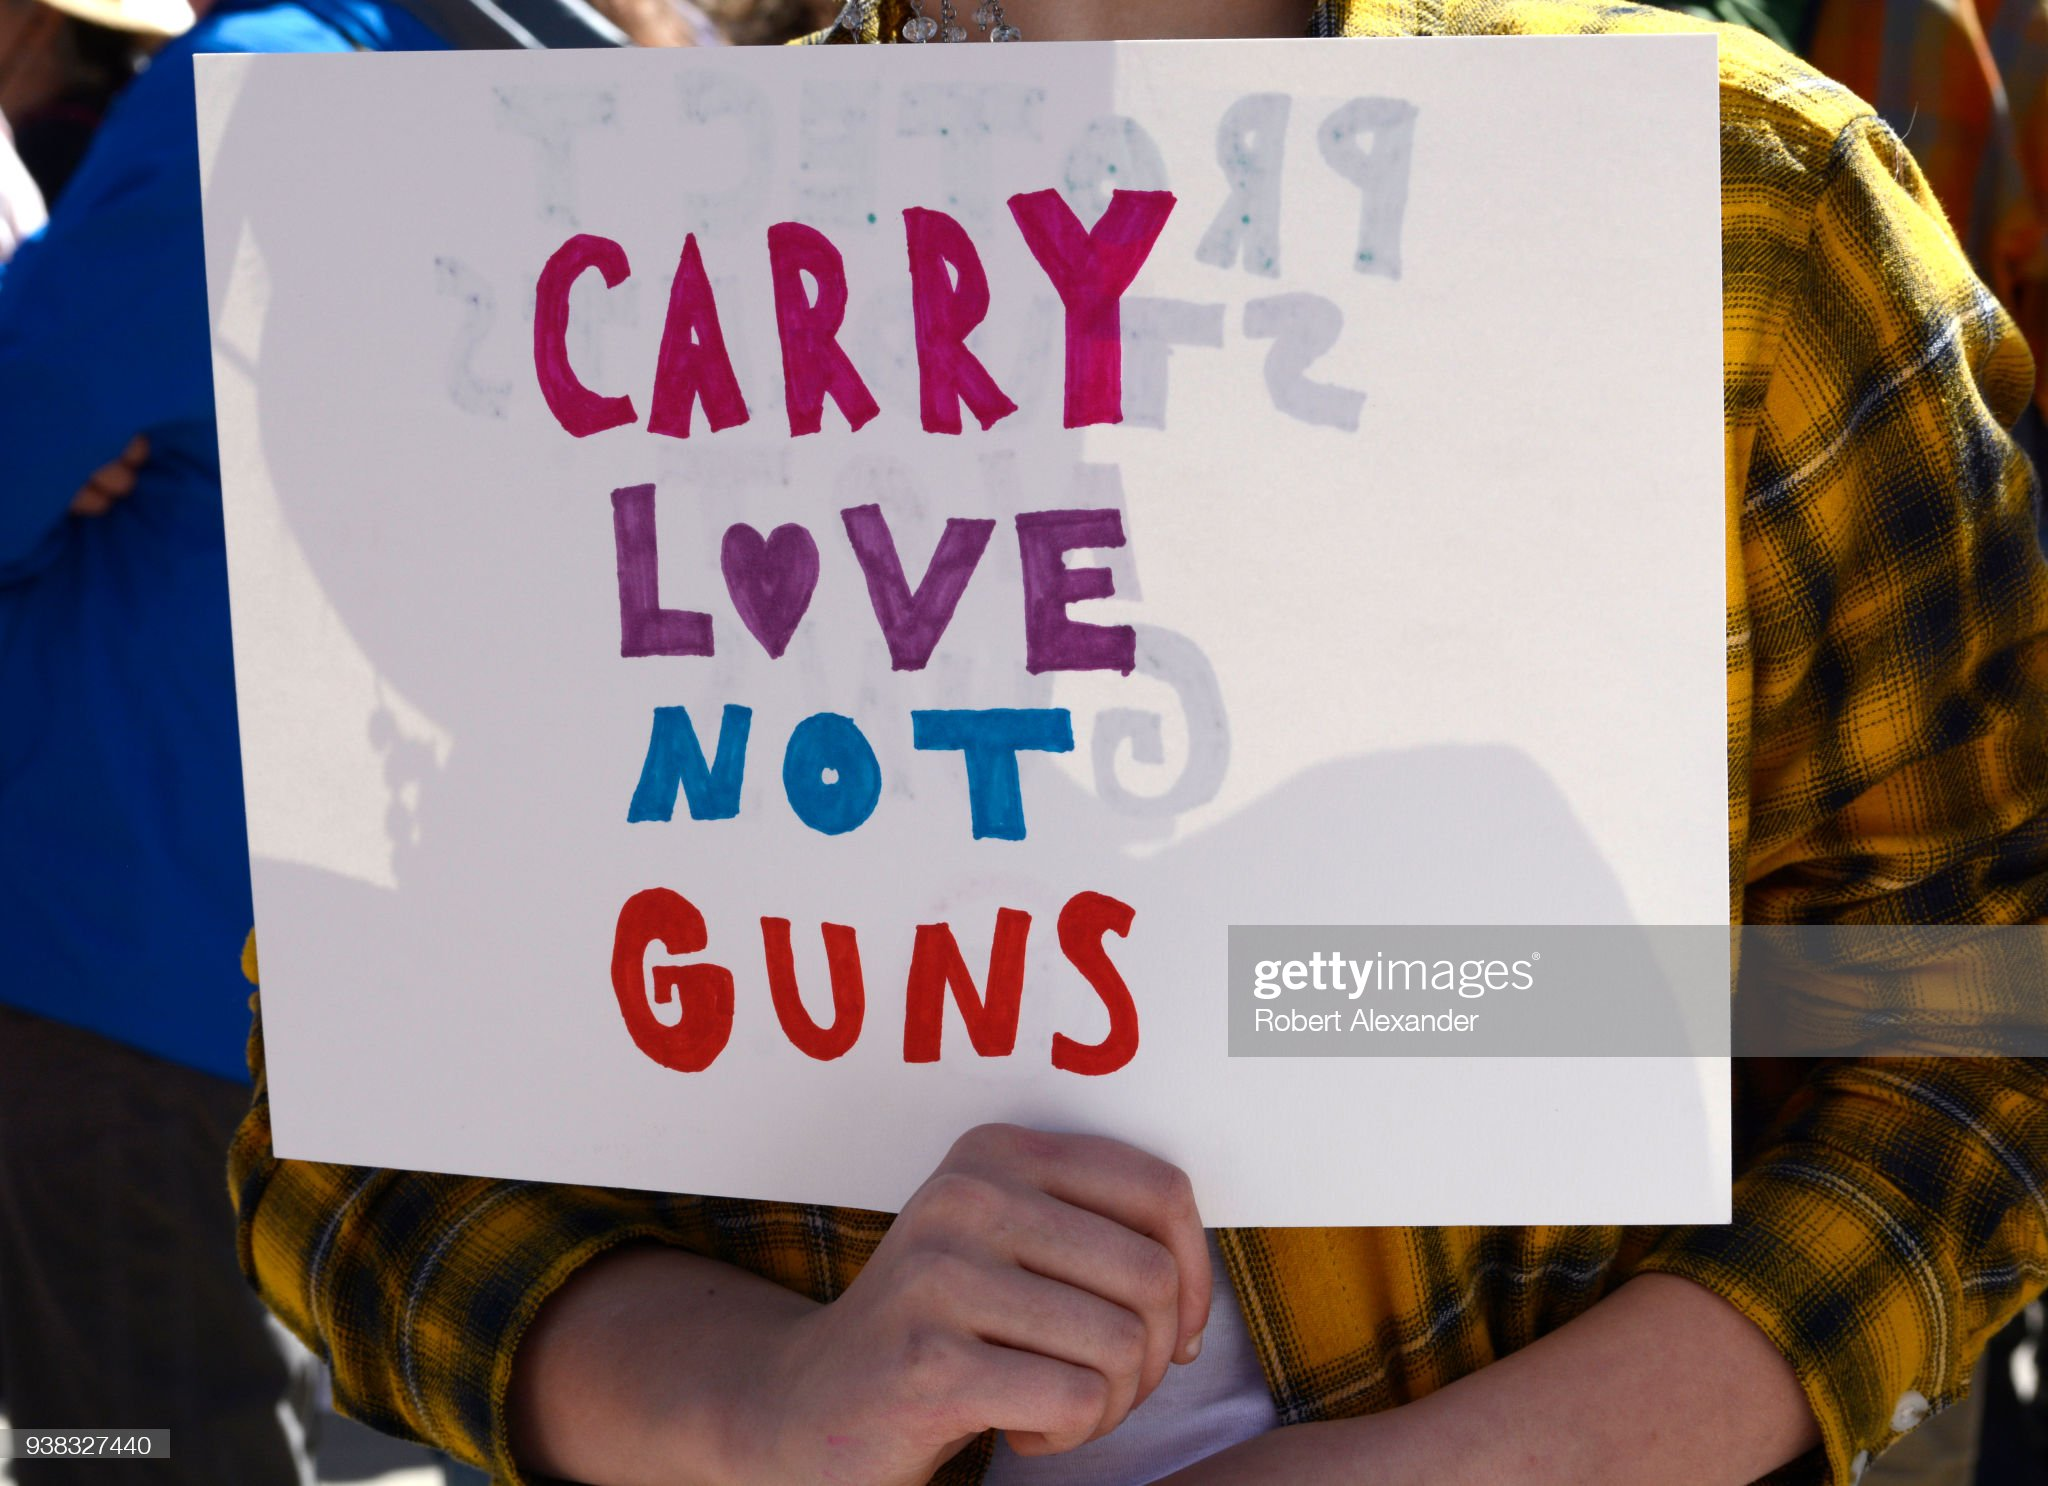